In [1]:
import numpy as np
from skimage import io
import os
import sys
import matplotlib.pyplot as plt
from scipy.io import loadmat
from natsort import natsorted
import random
import cv2

In [2]:
def read_lines(file_name):
    with open(file_name, 'r+') as f:
        fns = [line.strip() for line in f.readlines()]
        return fns

def generate_folder(folder):
    if not os.path.exists(folder):
        os.system('mkdir -p {}'.format(folder))

In [40]:
''' prepare the bounding box annotations for the dataset
'''
label_map = {1:"neutrophils",
            2:"bands",
            3:"eosinophils",
            4:"lymphocytes",
            5:"monocytes"}

# subset = 'train'
subset = 'valid'
# subset = 'test'
areas = []
dataset_dir = '/home/sh38/wb_cells/datasets/wbc_1024x1024'
fn_set = read_lines(dataset_dir + '/{}_list.txt'.format(subset))
fns = os.listdir(dataset_dir + '/rcnn/data')
print(len(fn_set))
file_name = dataset_dir + '/{}.csv'.format(subset)
with open(file_name, 'w+') as f:
    for i, fn in enumerate(fns):
        if not fn in fn_set:
            continue
        mask_dir = dataset_dir + '/rcnn/data/' + fn + '/masks'
        mask_fns = os.listdir(mask_dir)
        for mfn in mask_fns:
            mask_file = os.path.join(mask_dir, mfn)
            mask = io.imread(mask_file)
            cls = np.unique(mask)[-1]
            label = label_map[cls]
            ys, xs = np.where(mask > 0)
            areas.append(len(ys))
            if len(ys) < 100:
                continue
            f.write('{},{},{},{},{},{}\n'.format(dataset_dir + '/images/{}.png'.format(fn),\
                    min(xs), min(ys), max(xs), max(ys), label_map[cls]))
        if i % 100 == 0:
            print('The {}-th image processed!'.format(i))

100
The 500-th image processed!


In [24]:
with open('class.csv', 'w+') as f:
    for key in label_map.keys():
        f.write('{},{}\n'.format(label_map[key], key))

[1, 2, 1930, 1988, 2377, 2391, 2470, 2561, 2906, 2985]


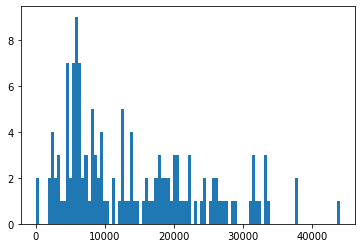

In [41]:
plt.hist(areas, bins = 100)
areas.sort()
print(areas[:10])

In [6]:
''' prepare the bounding box annotations for the white bright field
'''
label_map = {1:"neutrophils",
            2:"bands",
            3:"eosinophils",
            4:"lymphocytes",
            5:"monocytes"}

# subset = 'train'
# subset = 'valid'
subset = 'test'
areas = []
dataset_dir = '/home/sh38/wb_cells/datasets/wbc_1024x1024'
dataset_dir2 = '/home/sh38/wb_cells/datasets/wbc2_1024x1024'
fn_set = read_lines(dataset_dir + '/{}_list.txt'.format(subset))
fns = os.listdir(dataset_dir + '/rcnn/data')
print(len(fn_set))
file_name = dataset_dir2 + '/{}.csv'.format(subset)
with open(file_name, 'w+') as f:
    for i, fn in enumerate(fns):
        if not fn in fn_set:
            continue
        mask_dir = dataset_dir + '/rcnn/data/' + fn + '/masks'
        mask_fns = os.listdir(mask_dir)
        for mfn in mask_fns:
            mask_file = os.path.join(mask_dir, mfn)
            mask = io.imread(mask_file)
            cls = np.unique(mask)[-1]
            label = label_map[cls]
            ys, xs = np.where(mask > 0)
            areas.append(len(ys))
            if len(ys) < 100:
                continue
            f.write('{},{},{},{},{},{}\n'.format(dataset_dir2 + '/images/{}.png'.format(fn),\
                    min(xs), min(ys), max(xs), max(ys), label_map[cls]))
        if i % 100 == 0:
            print('The {}-th image processed!'.format(i))

100
The 0-th image processed!


In [6]:
''' prepare the bounding box annotations for the white bright field (docker version)
'''
label_map = {1:"neutrophils",
            2:"bands",
            3:"eosinophils",
            4:"lymphocytes",
            5:"monocytes"}

# subset = 'train'
subset = 'valid'
# subset = 'test'
areas = []
dataset_dir = '/home/sh38/wb_cells/datasets/wbc_1024x1024'
dataset_dir2 = '/data/datasets/wbc2_1024x1024'
output_dir = 'wc2_docker'  # the folder that save the output file
fn_set = read_lines(dataset_dir + '/{}_list.txt'.format(subset))
fns = os.listdir(dataset_dir + '/rcnn/data')
print(len(fn_set))
generate_folder(output_dir)
file_name = '{}/{}.csv'.format(output_dir, subset)
with open(file_name, 'w+') as f:
    for i, fn in enumerate(fns):
        if not fn in fn_set:
            continue
        mask_dir = dataset_dir + '/rcnn/data/' + fn + '/masks'
        mask_fns = os.listdir(mask_dir)
        for mfn in mask_fns:
            mask_file = os.path.join(mask_dir, mfn)
            mask = io.imread(mask_file)
            cls = np.unique(mask)[-1]
            label = label_map[cls]
            ys, xs = np.where(mask > 0)
            areas.append(len(ys))
            if len(ys) < 100:
                continue
            f.write('{},{},{},{},{},{}\n'.format(dataset_dir2 + '/images/{}.png'.format(fn),\
                    min(xs), min(ys), max(xs), max(ys), label_map[cls]))
        if i % 100 == 0:
            print('The {}-th image processed!'.format(i))

100
The 500-th image processed!


In [ ]:
''' prepare the bounding box annotations for the white bright field (docker version)
'''
label_map = {1:"neutrophils",
            2:"bands",
            3:"eosinophils",
            4:"lymphocytes",
            5:"monocytes"}

# subset = 'train'
subset = 'valid'
# subset = 'test'
areas = []
dataset_dir = '/home/sh38/wb_cells/datasets/wbc_1024x1024'
dataset_dir2 = '/data/datasets/wbc2_1024x1024'
output_dir = 'wc2_docker'  # the folder that save the output file
fn_set = read_lines(dataset_dir + '/{}_list.txt'.format(subset))
fns = os.listdir(dataset_dir + '/rcnn/data')
print(len(fn_set))
generate_folder(output_dir)
file_name = '{}/{}.csv'.format(output_dir, subset)
with open(file_name, 'w+') as f:
    for i, fn in enumerate(fns):
        if not fn in fn_set:
            continue
        mask_dir = dataset_dir + '/rcnn/data/' + fn + '/masks'
        mask_fns = os.listdir(mask_dir)
        for mfn in mask_fns:
            mask_file = os.path.join(mask_dir, mfn)
            mask = io.imread(mask_file)
            cls = np.unique(mask)[-1]
            label = label_map[cls]
            ys, xs = np.where(mask > 0)
            areas.append(len(ys))
            if len(ys) < 100:
                continue
            f.write('{},{},{},{},{},{}\n'.format(dataset_dir2 + '/images/{}.png'.format(fn),\
                    min(xs), min(ys), max(xs), max(ys), label_map[cls]))
        if i % 100 == 0:
            print('The {}-th image processed!'.format(i))

In [9]:
''' prepare the bounding box annotations for 4 types of cells(docker version)
'''
label_map = {1:"neutrophils",
            2:"bands",
            3:"eosinophils",
            4:"lymphocytes",
            5:"monocytes"}

# subset = 'train'
# subset = 'valid'
subset = 'test'
areas = []
dataset_dir = '/home/sh38/wb_cells/datasets/wbc_1024x1024'
dataset_dir2 = '/data/datasets/wbc2_1024x1024'
output_dir = 'wc2_docker'  # the folder that save the output file
fn_set = read_lines(dataset_dir + '/{}_list.txt'.format(subset))
fns = os.listdir(dataset_dir + '/rcnn/data')
print(len(fn_set))
generate_folder(output_dir)
file_name = '{}/{}2.csv'.format(output_dir, subset)
with open(file_name, 'w+') as f:
    for i, fn in enumerate(fns):
        if not fn in fn_set:
            continue
        mask_dir = dataset_dir + '/rcnn/data/' + fn + '/masks'
        mask_fns = os.listdir(mask_dir)
        for mfn in mask_fns:
            mask_file = os.path.join(mask_dir, mfn)
            mask = io.imread(mask_file)
            cls = np.unique(mask)[-1]
            label = label_map[cls]
            ys, xs = np.where(mask > 0)
            areas.append(len(ys))
            if len(ys) < 100:
                continue
            # skip the band category
            if cls == 2:
                continue
            f.write('{},{},{},{},{},{}\n'.format(dataset_dir2 + '/images/{}.png'.format(fn),\
                    min(xs), min(ys), max(xs), max(ys), label_map[cls]))
        if i % 100 == 0:
            print('The {}-th image processed!'.format(i))

100
The 0-th image processed!


In [26]:
''' generate the train/val/test file for the wbc datasets for docker
'''
# subset = 'train'
# subset = 'valid'
subset = 'test'
dataset = 'wbc2'
file_name = 'wc2_docker/{}2.csv'.format(subset)
output_dir = '{}_docker'.format(dataset)
generate_folder(output_dir)
output_file = output_dir + '/{}_4c.csv'.format(subset)
with open(file_name, 'r+') as f:
    lines = f.readlines()

with open(output_file, 'w+') as f:
    for line in lines:
        f.write(line.replace('wbc2_1024x1024', '{}_1024x1024'.format(dataset)))